In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
data = pd.read_csv('training.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,High(t-4),Low(t-4),Close_x(t-4),Close_y(t-4),reddit_sentiment(t-4),twitter_sentiment(t-4),High(t-3),Low(t-3),Close_x(t-3),Close_y(t-3),...,Low(t),Close_x(t),Close_y(t),reddit_sentiment(t),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,41.357375,37.129121,41.258595,2724.870117,0.0,0.137917,42.299388,40.576765,40.820099,2709.800049,...,41.793638,42.548553,2792.810059,0.0,0.345201,0.10921,2.230663,4.457843,1.05,43.286526
1,42.299388,40.576765,40.820099,2709.800049,0.0,0.262374,41.733154,40.983082,41.234718,2775.600098,...,41.012109,43.286526,2783.300049,0.0,0.213995,0.10921,2.230663,4.457843,1.05,45.493206
2,41.733154,40.983082,41.234718,2775.600098,0.0,0.291613,42.553395,41.009697,42.156582,2796.110107,...,43.400255,45.493206,2832.939941,0.0,0.283504,0.10921,2.230663,4.457843,1.05,45.667412
3,42.553395,41.009697,42.156582,2796.110107,0.0,0.280743,43.008275,41.793638,42.548553,2792.810059,...,44.697152,45.667412,2798.360107,0.0,0.259652,0.10921,2.230663,4.457843,1.05,46.272305
4,43.008275,41.793638,42.548553,2792.810059,0.0,0.345201,43.339757,41.012109,43.286526,2783.300049,...,44.660854,46.272305,2867.189941,0.0,0.213035,0.10921,2.230663,4.457843,1.05,48.416069


In [3]:
col_order = ['High(t-4)', 'High(t-3)', 'High(t-2)', 'High(t-1)', 'High(t)', 'Low(t-4)', 'Low(t-3)','Low(t-2)',
            'Low(t-1)', 'Low(t)', 'Close_x(t-4)', 'Close_x(t-3)', 'Close_x(t-2)', 'Close_x(t-1)', 'Close_x(t)',
            'Close_y(t-4)', 'Close_y(t-3)', 'Close_y(t-2)', 'Close_y(t-1)', 'Close_y(t)', 'reddit_sentiment(t-4)',
            'reddit_sentiment(t-3)', 'reddit_sentiment(t-2)', 'reddit_sentiment(t-1)', 'reddit_sentiment(t)',
            'twitter_sentiment(t-4)', 'twitter_sentiment(t-3)', 'twitter_sentiment(t-2)', 'twitter_sentiment(t-1)',
            'twitter_sentiment(t)', 'roe', 'debtToEquity', 'ev/ebitda', 'eps', 'Close_x1(t+1)']

In [4]:
data = data[col_order]

In [5]:
train_scaled = data.copy()
trform_list = {}

In [6]:
def minmaxscaler(index, row, in_size, num_var):
    trform_dict = {}
    trformed_row = []
    value = 0
    for i in range(num_var):
        cur = np.array(row[ i*in_size : (i+1)*in_size ])
        rowmaxmin = cur.max() - cur.min()
        rowmin = cur.min()
        trform_dict[i] = [rowmaxmin, rowmin]
        trform_list[index] = trform_dict
        cur = [ (x - rowmin) / (rowmaxmin) for x in cur]
        trformed_row.extend(cur)
        if (i == 2):
            target = row[-1]
            value = (target - rowmin) / rowmaxmin
    
    rest = np.array(row[ num_var*in_size : -1 ])
    trformed_row.extend(rest)
    trformed_row.append(value)
    return trformed_row

In [7]:
for index, row in train_scaled.iterrows():
    trformed_row = minmaxscaler(index, row, 5, 4)
    train_scaled.loc[index] = trformed_row

In [8]:
trform_list

{0: {0: [1.6508996621856014, 41.35737509596889],
  1: [4.664516461837827, 37.12912131720494],
  2: [1.728454589843757, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 1: {0: [1.6066030083946998, 41.73315406965472],
  1: [1.2168728890840015, 40.57676488995877],
  2: [2.4664268493652344, 40.820098876953125],
  3: [86.31005859375, 2709.800048828125]},
 2: {0: [3.8495757483225646, 41.73315406965472],
  1: [2.4171728787086195, 40.98308218455416],
  2: [4.2584877014160085, 41.23471832275391],
  3: [57.33984375, 2775.60009765625]},
 3: {0: [5.279552263537468, 42.55339511545279],
  1: [3.6874556125854525, 41.0096967766733],
  2: [3.5108299255371094, 42.15658187866211],
  3: [49.639892578125, 2783.300048828125]},
 4: {0: [4.824672620835763, 43.00827475815449],
  1: [3.685043049241912, 41.01210934001684],
  2: [3.7237510681152273, 42.54855346679688],
  3: [83.889892578125, 2783.300048828125]},
 5: {0: [5.10776415869946, 43.339757078049416],
  1: [5.214226761622228, 41.0121093400

In [9]:
train_scaled.head()

,High(t-4),High(t-3),High(t-2),High(t-1),High(t),Low(t-4),Low(t-3),Low(t-2),Low(t-1),Low(t),...,twitter_sentiment(t-4),twitter_sentiment(t-3),twitter_sentiment(t-2),twitter_sentiment(t-1),twitter_sentiment(t),roe,debtToEquity,ev/ebitda,eps,Close_x1(t+1)
0,0.000000,0.570606,0.227621,0.724466,1.000000,0.000000,0.739121,0.826229,0.831935,1.000000,...,0.137917,0.262374,0.291613,0.280743,0.345201,0.10921,2.230663,4.457843,1.05,1.426955
1,0.352442,0.000000,0.510544,0.793675,1.000000,0.000000,0.333903,0.355774,1.000000,0.357757,...,0.262374,0.291613,0.280743,0.345201,0.213995,0.10921,2.230663,4.457843,1.05,1.894687
2,0.000000,0.213073,0.331237,0.417345,1.000000,0.000000,0.011011,0.335332,0.012009,1.000000,...,0.291613,0.280743,0.345201,0.213995,0.283504,0.10921,2.230663,4.457843,1.05,1.040908
3,0.000000,0.086159,0.148945,0.573786,1.000000,0.000000,0.212597,0.000654,0.648295,1.000000,...,0.280743,0.345201,0.213995,0.283504,0.259652,0.10921,2.230663,4.457843,1.05,1.172293
4,0.000000,0.068706,0.533602,1.000000,0.758775,0.212081,0.000000,0.648065,1.000000,0.990150,...,0.345201,0.213995,0.283504,0.259652,0.213035,0.10921,2.230663,4.457843,1.05,1.575700


In [10]:
x = train_scaled.drop("Close_x1(t+1)", axis=1)
y = train_scaled["Close_x1(t+1)"]

In [11]:
# Take last 50 days as test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=88, shuffle=False)

In [12]:
# Shuffle the first 150 days as train data
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [13]:
ab_performance_tracker = pd.DataFrame(columns=["MAE", "MSE", "RMSE", "R2"])

In [14]:
def build_adaboost(max_depth, n_estimators, learning_rate):
    base_estimator = DecisionTreeRegressor(max_depth=max_depth)
    ab = AdaBoostRegressor(base_estimator=base_estimator, 
                           n_estimators=n_estimators, 
                           learning_rate=learning_rate)
    
    ab.fit(X_train, y_train)
    y_pred = ab.predict(X_test)

    ab_performance_tracker.loc[f"Adaboost {len(ab_performance_tracker) + 1}"] = [
        mean_absolute_error(y_trformed, pred_trformed),
        mean_squared_error(y_trformed, pred_trformed),
        mean_squared_error(y_trformed, pred_trformed, squared=False),
        r2_score(y_trformed, pred_trformed)
    ]

In [15]:
def adaboost_grid_search(max_depth, n_estimators, learning_rate):
    ab_param_grid = {
        'base_estimator__max_depth': max_depth,
        'n_estimators': n_estimators,
        'learning_rate': learning_rate
    }
    
    base_estimator = DecisionTreeRegressor()
    
    ab = AdaBoostRegressor(base_estimator=base_estimator)
    
    grid_search = GridSearchCV(ab, param_grid=ab_param_grid, cv=5)


    grid_search.fit(X_train, y_train)

    return grid_search.best_params_

In [16]:
build_adaboost(3, 50, 1.0) #1

In [17]:
adaboost_grid_search([1, 3, 5, 7], [25, 50, 75, 100], [0.1, 0.5, 1.0, 1.5]) 

{'base_estimator__max_depth': 5, 'learning_rate': 1.5, 'n_estimators': 25}

In [22]:
build_adaboost(5, 25, 1.5) #2

In [24]:
adaboost_grid_search(range(2, 7), [15, 20, 25, 30], [0.75, 1.0, 1.25, 1.5]) 

{'base_estimator__max_depth': 6, 'learning_rate': 0.75, 'n_estimators': 15}

In [25]:
build_adaboost(6, 15, 0.75) #3

In [30]:
adaboost_grid_search(range(3, 8), [10, 12, 15, 17, 20], [0.5, 0.6, 0.75, 0.9, 1.0]) 

{'base_estimator__max_depth': 6, 'learning_rate': 0.6, 'n_estimators': 15}

In [31]:
build_adaboost(6, 15, 0.6) #4

In [32]:
ab_performance_tracker

,MAE,MSE,RMSE,R2
Adaboost 1,7.019982,64.507941,8.031684,0.588055
Adaboost 2,7.356481,73.133038,8.551786,0.532975
Adaboost 3,6.755820,64.631332,8.039361,0.587267
Adaboost 4,8.046988,101.351521,10.067349,0.352773


In [40]:
# Final model
base_estimator = DecisionTreeRegressor(max_depth=3)
ab = AdaBoostRegressor(base_estimator=base_estimator, 
                       n_estimators=50, 
                       learning_rate=1.0)

ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)

pred_trformed = [y_pred[x-150] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index]
y_trformed =  [y_test[x] * trform_list[x][2][0] + trform_list[x][2][1] for x in y_test.index]

mae = mean_absolute_error(y_trformed, pred_trformed)
mse = mean_squared_error(y_trformed, pred_trformed)
rmse = mean_squared_error(y_trformed, pred_trformed, squared=False)
r2 = r2_score(y_trformed, pred_trformed)
    
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared:', r2)    

Mean Absolute Error: 7.148166160328142
Mean Squared Error: 64.94845007702538
Root Mean Squared Error: 8.059060123676048
R-squared: 0.5852414262363559


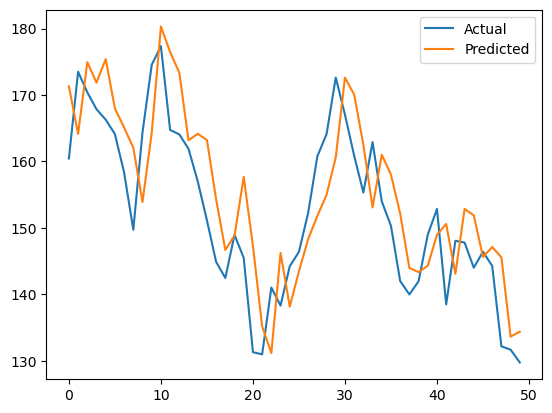

In [42]:
plt.plot(y_trformed, label='Actual')
plt.plot(pred_trformed, label='Predicted')
plt.legend()
plt.show()